In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import pickle
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [ ]:
import pandas as pd

# Load each Excel file into a DataFrame
transaction_data = pd.read_excel("C:/Users/user/Downloads/Transaction.xlsx")
user_data = pd.read_excel("C:/Users/user/Downloads/User.xlsx")
city_data = pd.read_excel('C:/Users/user/Downloads/City.xlsx')
attraction_data = pd.read_excel("C:/Users/user/Downloads/Item.xlsx")
visit_mode_data = pd.read_excel("C:/Users/user/Downloads/Mode.xlsx")
continent_data = pd.read_excel("C:/Users/user/Downloads/Continent.xlsx")
country_data = pd.read_excel("C:/Users/user/Downloads/Country.xlsx")
region_data = pd.read_excel("C:/Users/user/Downloads/Region.xlsx")
attraction_type_data = pd.read_excel("C:/Users/user/Downloads/Type.xlsx")

In [5]:
# EDA
citydetail_df = pd.merge(user_data, city_data, on='CityId', how='inner')
citydetail_df.drop("CountryId_y", axis=1, inplace=True)
citydetail_df.rename(columns={'CountryId_x': 'CountryId'}, inplace=True)
countrydetail_df = pd.merge(citydetail_df, country_data, on='CountryId', how='inner')
countrydetail_df.drop("RegionId_y", axis=1, inplace=True)
countrydetail_df.rename(columns={'RegionId_x': 'RegionId'}, inplace=True)
countrydetail_df = pd.merge(countrydetail_df, region_data, on='RegionId', how='inner')
#countrydetail_df
countrydetail_df.drop("ContinentId_y", axis=1, inplace=True)
countrydetail_df.rename(columns={'ContinentId_x': 'ContinentId'}, inplace=True)
continent_data.rename(columns={'ContenentId': 'ContinentId'}, inplace=True)
userdetails_df = pd.merge(countrydetail_df, continent_data, on='ContinentId', how='inner')
transactiondetails_df = pd.merge(transaction_data, attraction_data, on='AttractionId', how='inner')
transactiondetails_df.rename(columns={'VisitMode': 'VisitModeId'}, inplace=True)
transactiondetails_df = pd.merge(transactiondetails_df, visit_mode_data, on='VisitModeId', how='inner')
transactiondetails_df = pd.merge(transactiondetails_df, attraction_type_data, on='AttractionTypeId', how='inner')

In [8]:


from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

user_recom = transactiondetails_df
user_recom = user_recom.sample(min(20000, len(transactiondetails_df))) 

user_item_matrix = user_recom.pivot_table('Rating', ['UserId'], 'AttractionId')
user_item_matrix.fillna(0, inplace=True)
user_item_matrix_sparse = csr_matrix(user_item_matrix) # Convert to sparse matrix
user_mat_sim = cosine_similarity(user_item_matrix_sparse) #calculate cosine similarity from the sparse matrix.

In [9]:
user_recom

,TransactionId,UserId,VisitYear,VisitMonth,VisitModeId,AttractionId,Rating,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress,VisitMode,AttractionType
41480,108249,86851,2015,10,2,737,4,1,76,Tanah Lot Temple,"Kecamatan Kediri, Kabupaten Tabanan, Beraban 8...",Couples,Religious Sites
28078,47646,19572,2019,3,4,824,4,1,76,Uluwatu Temple,"Jl. Raya Uluwatu Southern part of Bali, Pecatu...",Friends,Religious Sites
45189,194894,74461,2019,9,2,888,5,2,61,Bromo Tengger Semeru National Park,"Asrikaton - Pakis, Malang 65100 Indonesia",Couples,National Parks
23621,37308,73154,2017,9,3,481,5,1,13,Nusa Dua Beach,"Semenanjung Nusa Dua, Nusa Dua 80517 Indonesia",Family,Beaches
16933,25659,48110,2017,3,2,841,5,1,92,Waterbom Bali,"Jl. Kartika Plaza, Kuta 80361 Indonesia",Couples,Water Parks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24479,38454,46228,2014,6,3,481,5,1,13,Nusa Dua Beach,"Semenanjung Nusa Dua, Nusa Dua 80517 Indonesia",Family,Beaches
33268,69457,50675,2018,7,2,748,5,1,72,Tegalalang Rice Terrace,"Jalan Raya Ceking, Tegalalang 80517 Indonesia",Couples,Points of Interest & Landmarks
21722,34272,8941,2016,4,2,673,3,1,13,Seminyak Beach,Seminyak,Couples,Beaches
42318,109309,10047,2014,1,3,737,4,1,76,Tanah Lot Temple,"Kecamatan Kediri, Kabupaten Tabanan, Beraban 8...",Family,Religious Sites


In [10]:
user_item_matrix
user_mat_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.49236596, 0.31665025,
        0.49236596],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.49236596, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.        , 0.31665025, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.49236596, 0.        , ..., 1.        , 0.        ,
        1.        ]], shape=(16149, 16149))

In [11]:
df = pd.merge(userdetails_df, transactiondetails_df, on='UserId', how='inner')
df = df.sample(30000)

In [12]:
df

,UserId,ContinentId,RegionId,CountryId,CityId,CityName,Country,Region,Continent,TransactionId,...,VisitMonth,VisitModeId,AttractionId,Rating,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress,VisitMode,AttractionType
49189,81722,2,8,51,1974.0,Tampa,United States,Northern America,America,200524,...,11,2,1166,3,3,34,Malioboro Road,Yogyakarta,Couples,Flea & Street Markets
19206,34033,3,14,106,3551.0,Singapore,Singapore,South East Asia,Asia,199505,...,11,2,1166,4,3,34,Malioboro Road,Yogyakarta,Couples,Flea & Street Markets
39175,65768,3,14,101,3297.0,Yogyakarta Region,Indonesia,South East Asia,Asia,203253,...,12,3,1171,3,3,91,Merapi Volcano,Yogyakarta,Family,Volcanos
25767,44388,3,0,62,2253.0,Asia,Asia,-,Asia,206618,...,8,2,1238,4,3,2,Sewu Temple,Yogyakarta,Couples,Ancient Ruins
43115,72044,2,8,51,765.0,Boston,United States,Northern America,America,4997,...,2,4,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Friends,Nature & Wildlife Areas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6383,11729,5,17,130,6117.0,Warsaw,Poland,Central Europe,Europe,198964,...,11,3,1166,3,3,34,Malioboro Road,Yogyakarta,Family,Flea & Street Markets
12029,21522,3,14,106,3551.0,Singapore,Singapore,South East Asia,Asia,145628,...,9,2,369,4,1,13,Kuta Beach - Bali,Kuta,Couples,Beaches
36143,61010,3,14,108,3677.0,Vietnam,Vietnam,South East Asia,Asia,147529,...,4,4,369,4,1,13,Kuta Beach - Bali,Kuta,Friends,Beaches
13542,24025,4,15,109,3915.0,Brisbane,Australia,Australia,Australia & Oceania,23976,...,1,2,841,5,1,92,Waterbom Bali,"Jl. Kartika Plaza, Kuta 80361 Indonesia",Couples,Water Parks


In [13]:
df.drop("ContinentId", axis=1, inplace=True)
df.drop("RegionId", axis=1, inplace=True)
df.drop("CountryId", axis=1, inplace=True)
df.drop("CityId", axis=1, inplace=True)
df.drop("Country", axis=1, inplace=True)
df.drop("Region", axis=1, inplace=True)
df.drop("Continent", axis=1, inplace=True)
df.drop("TransactionId", axis=1, inplace=True)
df.drop("VisitYear", axis=1, inplace=True)
df.drop("VisitMonth", axis=1, inplace=True)
df.drop("VisitModeId", axis=1, inplace=True)
df.drop("AttractionId", axis=1, inplace=True)
df.drop("AttractionAddress", axis=1, inplace=True)
df.drop("AttractionCityId", axis=1, inplace=True)
df.drop("AttractionTypeId", axis=1, inplace=True)


In [14]:
df

,UserId,CityName,Rating,Attraction,VisitMode,AttractionType
49189,81722,Tampa,3,Malioboro Road,Couples,Flea & Street Markets
19206,34033,Singapore,4,Malioboro Road,Couples,Flea & Street Markets
39175,65768,Yogyakarta Region,3,Merapi Volcano,Family,Volcanos
25767,44388,Asia,4,Sewu Temple,Couples,Ancient Ruins
43115,72044,Boston,5,Sacred Monkey Forest Sanctuary,Friends,Nature & Wildlife Areas
...,...,...,...,...,...,...
6383,11729,Warsaw,3,Malioboro Road,Family,Flea & Street Markets
12029,21522,Singapore,4,Kuta Beach - Bali,Couples,Beaches
36143,61010,Vietnam,4,Kuta Beach - Bali,Friends,Beaches
13542,24025,Brisbane,5,Waterbom Bali,Couples,Water Parks


In [15]:
col = ['UserId', 'CityName', 'Attraction', 'VisitMode', 'AttractionType', 'Rating']
df = df[col]

col1 = ['CityName', 'Rating', 'Attraction', 'VisitMode']
data = df[col1]

In [16]:
df


,UserId,CityName,Attraction,VisitMode,AttractionType,Rating
49189,81722,Tampa,Malioboro Road,Couples,Flea & Street Markets,3
19206,34033,Singapore,Malioboro Road,Couples,Flea & Street Markets,4
39175,65768,Yogyakarta Region,Merapi Volcano,Family,Volcanos,3
25767,44388,Asia,Sewu Temple,Couples,Ancient Ruins,4
43115,72044,Boston,Sacred Monkey Forest Sanctuary,Friends,Nature & Wildlife Areas,5
...,...,...,...,...,...,...
6383,11729,Warsaw,Malioboro Road,Family,Flea & Street Markets,3
12029,21522,Singapore,Kuta Beach - Bali,Couples,Beaches,4
36143,61010,Vietnam,Kuta Beach - Bali,Friends,Beaches,4
13542,24025,Brisbane,Waterbom Bali,Couples,Water Parks,5


In [17]:
data

,CityName,Rating,Attraction,VisitMode
49189,Tampa,3,Malioboro Road,Couples
19206,Singapore,4,Malioboro Road,Couples
39175,Yogyakarta Region,3,Merapi Volcano,Family
25767,Asia,4,Sewu Temple,Couples
43115,Boston,5,Sacred Monkey Forest Sanctuary,Friends
...,...,...,...,...
6383,Warsaw,3,Malioboro Road,Family
12029,Singapore,4,Kuta Beach - Bali,Couples
36143,Vietnam,4,Kuta Beach - Bali,Friends
13542,Brisbane,5,Waterbom Bali,Couples


In [19]:
from sklearn.preprocessing import LabelEncoder

features = ['UserId', 'CityName', 'Attraction', 'VisitMode', 'AttractionType']
RegClassfeatures = ['CityName', 'Rating', 'Attraction']

label_encoder = {}
for i in features:
    if 'object' in str(df[i].dtype):  # Improved dtype check
        label_encoder[i] = LabelEncoder()
        df.loc[:, i] = label_encoder[i].fit_transform(df[i]) # use .loc

rclabel_encoder = {}
for i in RegClassfeatures:
    if 'object' in str(data[i].dtype): # Improved dtype check
        rclabel_encoder[i] = LabelEncoder()
        data.loc[:, i] = rclabel_encoder[i].fit_transform(data[i]) # use .loc


In [22]:
from sklearn.ensemble import RandomForestRegressor

# Model Training (Random Forest Regressor)
X_reg = df[features]
y_reg = df['Rating']
model = RandomForestRegressor(random_state=42)
model.fit(X_reg, y_reg)

RandomForestRegressor(random_state=42)

In [24]:
from sklearn.ensemble import RandomForestClassifier

# # Model Training (Random Forest Classifier)
# X_class = data[RegClassfeatures[:-1]] #remove VisitMode
# y_class = data['VisitMode']
# rc = RandomForestClassifier(random_state=42)
# rc.fit(X_class, y_class)

# Model Training (Random Forest Classifier)
X_class = data[RegClassfeatures] # Include Attraction
y_class = data['VisitMode']
rc = RandomForestClassifier(random_state=42)
rc.fit(X_class, y_class)

RandomForestClassifier(random_state=42)

In [ ]:
import pickle

# Save Models and Encoders
pickle.dump(model, open('rf_regressor.pkl', 'wb'))
pickle.dump(rc, open('recomClassifier.pkl', 'wb'))
pickle.dump(label_encoder, open('label_encoder.pkl', 'wb'))
pickle.dump(rclabel_encoder, open('rclabel_encoder.pkl', 'wb'))

# Save additional pkl files
pickle.dump(user_mat_sim, open('user_mat_sim.pkl', 'wb'))
pickle.dump(user_item_matrix, open('user_item_matrix.pkl', 'wb'))
pickle.dump(user_recom, open('user_recom.pkl', 'wb'))
pickle.dump(df, open('df.pkl', 'wb'))
pickle.dump(visit_mode_data, open('mode_df.pkl', 'wb'))
pickle.dump(attraction_type_data, open('type_df.pkl', 'wb'))

print("Models, encoders, and additional data saved successfully!")

Models, encoders, and additional data saved successfully!


In [10]:
import pandas as pd
import pickle
import os
from sklearn.model_selection import train_test_split

# 1. First load your existing data and encoders
def load_existing_data():
    pickle_dir = r'D:/GuviCoruseDoc/Data_Science/Mini_Project_4/env/Scripts'
    
    # Load your main dataframe
    with open(os.path.join(pickle_dir, 'df.pkl'), 'rb') as f:
        df = pickle.load(f)
    
    # Load your encoders
    with open(os.path.join(pickle_dir, 'label_encoder.pkl'), 'rb') as f:
        label_encoder = pickle.load(f)
    
    with open(os.path.join(pickle_dir, 'rclabel_encoder.pkl'), 'rb') as f:
        rclabel_encoder = pickle.load(f)
    
    return df, label_encoder, rclabel_encoder

# Load the data
df, label_encoder, rclabel_encoder = load_existing_data()

# 2. Prepare and save regression test data
reg_features = ['UserId', 'CityName', 'Attraction', 'VisitMode', 'AttractionType']
reg_target = 'Rating'

X_reg = df[reg_features]
y_reg = df[reg_target]

# Encode categorical variables
for col in ['CityName', 'Attraction', 'VisitMode', 'AttractionType']:
    if col in label_encoder:
        # Ensure the encoder is trained on all possible values
        all_values = df[col].unique()
        label_encoder[col].fit(all_values)
        X_reg[col] = label_encoder[col].transform(X_reg[col])

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42)

# 3. Prepare and save classification test data
clf_features = ['CityName', 'Rating', 'Attraction']
clf_target = 'VisitMode'

X_clf = df[clf_features]
y_clf = df[clf_target]

# Encode categorical variables
for col in ['CityName', 'Attraction']:
    if col in rclabel_encoder:
        # Ensure the encoder is trained on all possible values
        all_values = df[col].unique()
        rclabel_encoder[col].fit(all_values)
        X_clf[col] = rclabel_encoder[col].transform(X_clf[col])
if 'VisitMode' in rclabel_encoder:
    # Ensure the encoder is trained on all possible values
    all_values = df['VisitMode'].unique()
    rclabel_encoder['VisitMode'].fit(all_values)
    y_clf = rclabel_encoder['VisitMode'].transform(y_clf)

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42)

# 4. Save all test data to pickle files
pickle_dir = r'D:/GuviCoruseDoc/Data_Science/Mini_Project_4/env/Scripts'

# Save regression test data
with open(os.path.join(pickle_dir, 'X_test.pkl'), 'wb') as f:
    pickle.dump(X_test_reg, f)
    
with open(os.path.join(pickle_dir, 'y_test.pkl'), 'wb') as f:
    pickle.dump(y_test_reg, f)

# Save classification test data
with open(os.path.join(pickle_dir, 'X_test_clf.pkl'), 'wb') as f:
    pickle.dump(X_test_clf, f)
    
with open(os.path.join(pickle_dir, 'y_test_clf.pkl'), 'wb') as f:
    pickle.dump(y_test_clf, f)

print("Test data successfully saved to pickle files")

Test data successfully saved to pickle files


C:\Users\user\AppData\Local\Temp\ipykernel_8264\3895461105.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_reg[col] = label_encoder[col].transform(X_reg[col])
C:\Users\user\AppData\Local\Temp\ipykernel_8264\3895461105.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_reg[col] = label_encoder[col].transform(X_reg[col])
C:\Users\user\AppData\Local\Temp\ipykernel_8264\3895461105.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

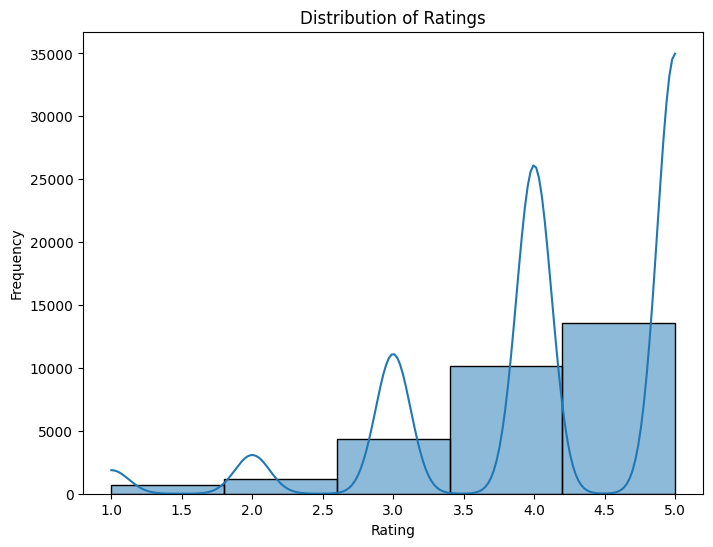

In [27]:
# Graphical Representations
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution of Ratings
plt.figure(figsize=(8, 6))
sns.histplot(df['Rating'], bins=5, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

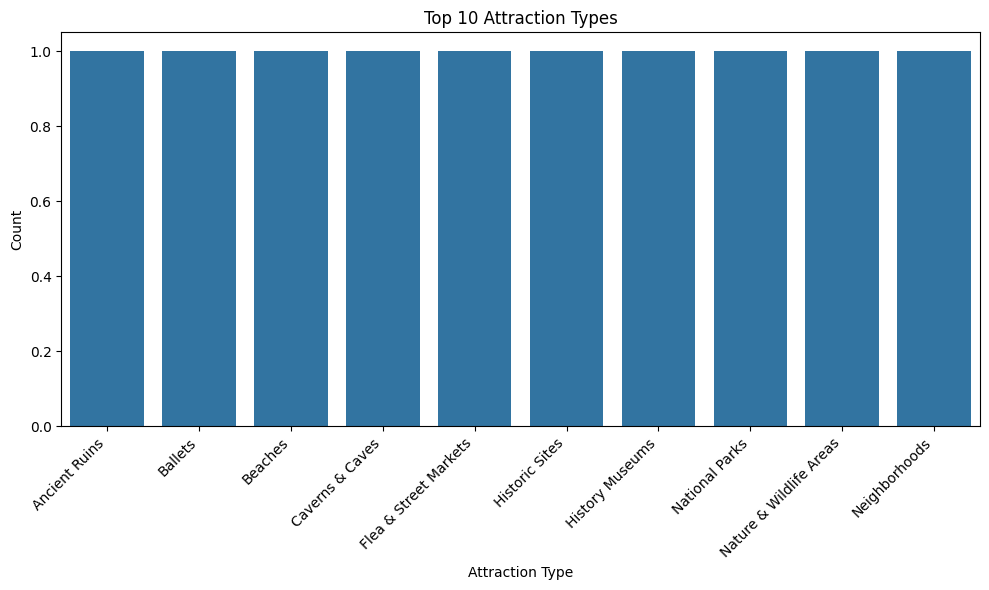

In [29]:
# 2. Top 10 Attraction Types
plt.figure(figsize=(10, 6))
top_attraction_types = attraction_type_data['AttractionType'].value_counts().head(10)
sns.barplot(x=top_attraction_types.index, y=top_attraction_types.values)
plt.title('Top 10 Attraction Types')
plt.xlabel('Attraction Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

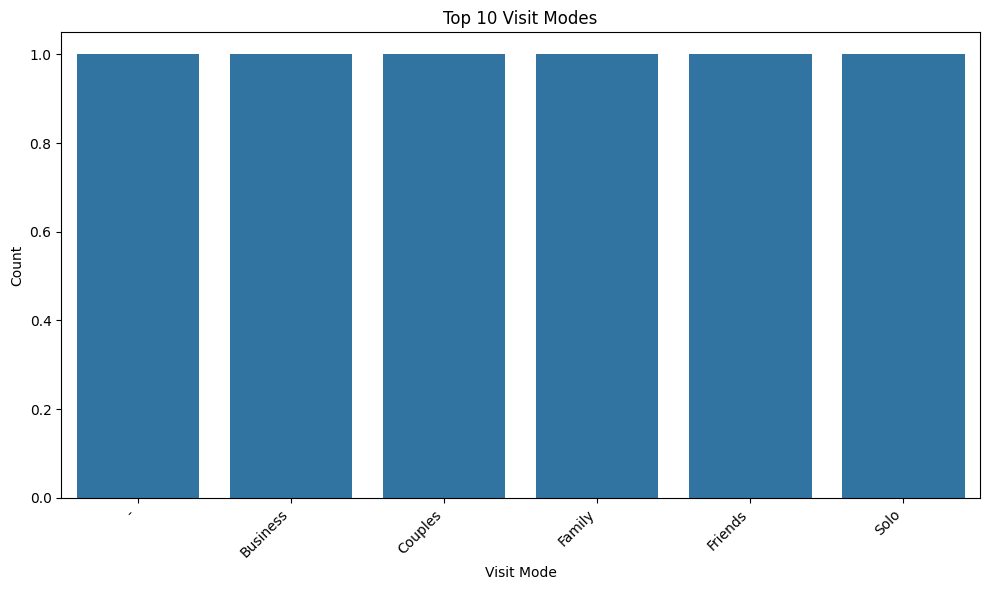

In [30]:
# 3. Top 10 Visit Modes
plt.figure(figsize=(10, 6))
top_visit_modes = visit_mode_data['VisitMode'].value_counts().head(10)
sns.barplot(x=top_visit_modes.index, y=top_visit_modes.values)
plt.title('Top 10 Visit Modes')
plt.xlabel('Visit Mode')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

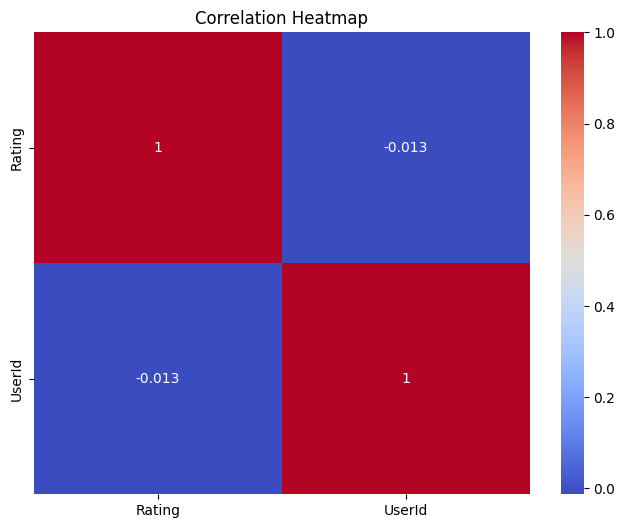

In [31]:
# 4. Correlation Heatmap (for numerical features, if any)
if 'Rating' in df.columns and 'UserId' in df.columns:
    corr_matrix = df[['Rating', 'UserId']].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

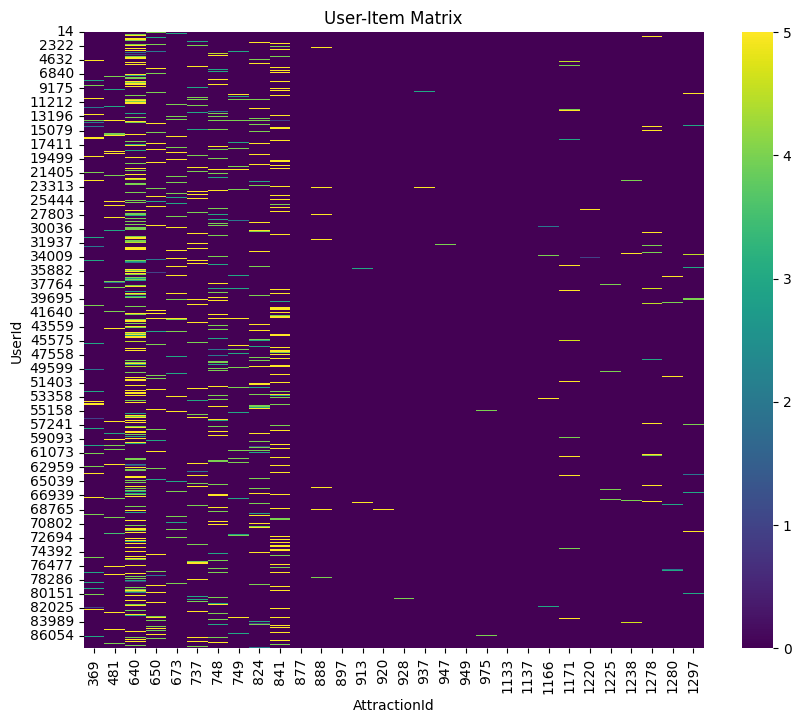

In [32]:
# 5. User Item Matrix Visualization (if small enough to visualize)
plt.figure(figsize=(10, 8))
sns.heatmap(user_item_matrix, cmap='viridis', cbar=True)
plt.title('User-Item Matrix')
plt.xlabel('AttractionId')
plt.ylabel('UserId')
plt.show()

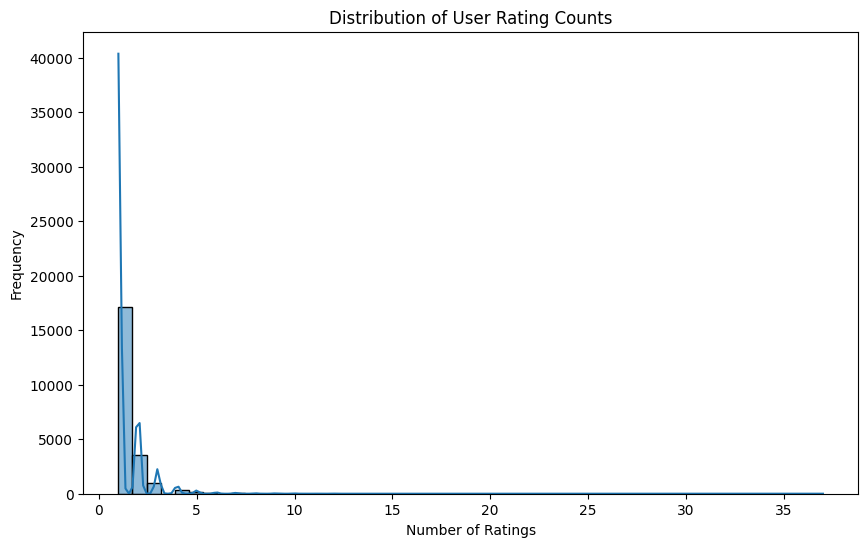

In [33]:
# 6. Distribution of User Ratings
plt.figure(figsize=(10, 6))
user_rating_counts = df['UserId'].value_counts()
sns.histplot(user_rating_counts, bins=50, kde=True)
plt.title('Distribution of User Rating Counts')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

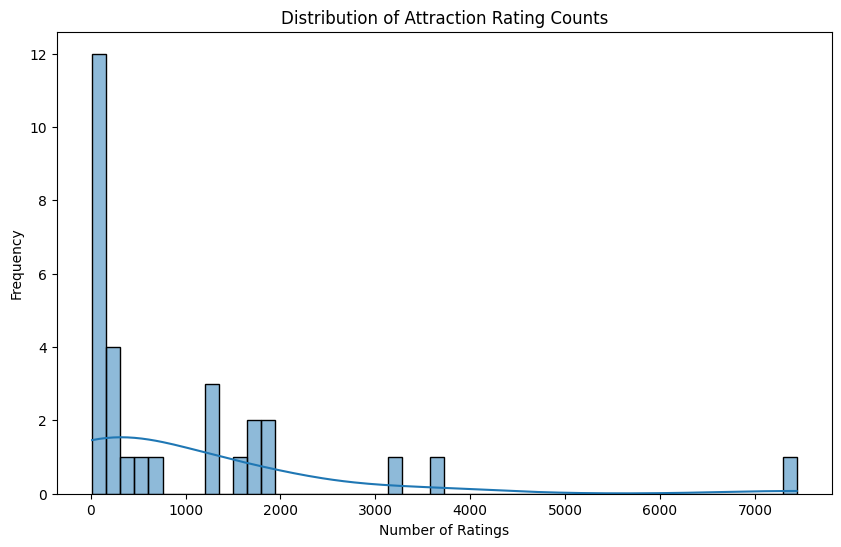

In [34]:
# 7. Distribution of Attraction Ratings
plt.figure(figsize=(10, 6))
attraction_rating_counts = df['Attraction'].value_counts()
sns.histplot(attraction_rating_counts, bins=50, kde=True)
plt.title('Distribution of Attraction Rating Counts')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

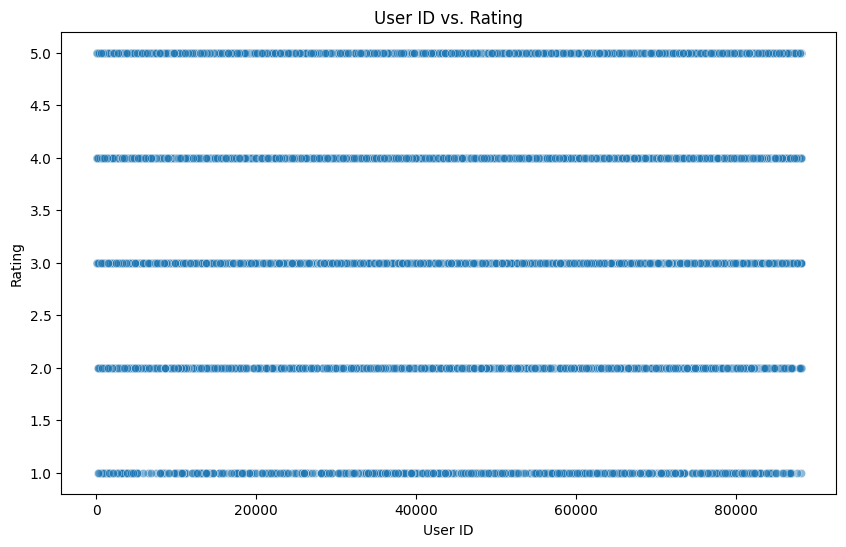

In [35]:
# 8. Scatter Plot of User ID vs. Rating (if meaningful)
if 'UserId' in df.columns and 'Rating' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='UserId', y='Rating', data=df, alpha=0.5)
    plt.title('User ID vs. Rating')
    plt.xlabel('User ID')
    plt.ylabel('Rating')
    plt.show()

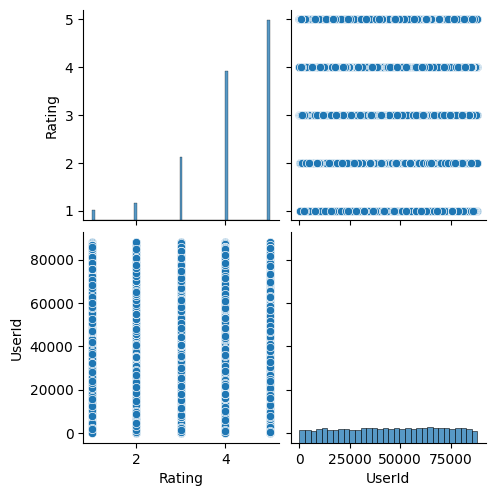

In [36]:
# 9. pairplot for numerical features if any.
if 'Rating' in df.columns and 'UserId' in df.columns:
    sns.pairplot(df[['Rating', 'UserId']])
    plt.show()

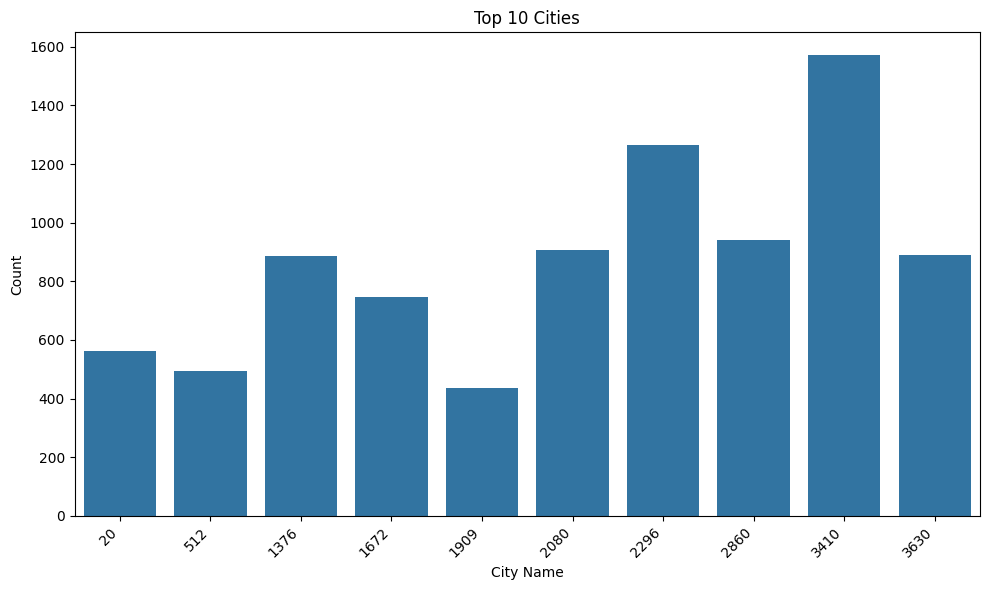

In [37]:
# 10. Bar Plot of top cities.
plt.figure(figsize=(10, 6))
top_cities = df['CityName'].value_counts().head(10)
sns.barplot(x=top_cities.index, y=top_cities.values)
plt.title('Top 10 Cities')
plt.xlabel('City Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [11]:
print("Available keys in rclabel_encoder:", rclabel_encoder.keys())

Available keys in rclabel_encoder: dict_keys(['CityName', 'Attraction'])


In [12]:
from sklearn.preprocessing import LabelEncoder

# Encoding categorical features
categorical_features = ['VisitMode', 'CityName', 'Attraction']
rclabel_encoder = {}

for col in categorical_features:
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        rclabel_encoder[col] = le  # Store the encoder


In [13]:
print("Before encoding, VisitMode values:", df['VisitMode'].unique())
print("Available keys after encoding:", rclabel_encoder.keys())


Before encoding, VisitMode values: [1 2 3 0 4]
Available keys after encoding: dict_keys(['VisitMode', 'CityName', 'Attraction'])


In [14]:
df['VisitMode'].fillna('Unknown', inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_8264\3248378358.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['VisitMode'].fillna('Unknown', inplace=True)


In [15]:
from sklearn.preprocessing import LabelEncoder

categorical_features = ['VisitMode', 'CityName', 'Attraction']
rclabel_encoder = {}

for col in categorical_features:
    if col in df.columns:
        df[col] = df[col].fillna('Unknown')  # Handle missing values
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        rclabel_encoder[col] = le  # Store the encoder


In [16]:
# Decode numeric CityName values back to strings if a mapping exists
if 'CityName' in rclabel_encoder and hasattr(rclabel_encoder['CityName'], 'classes_'):
    city_mapping = {i: name for i, name in enumerate(rclabel_encoder['CityName'].classes_)}
    df['CityName'] = df['CityName'].map(city_mapping)

In [17]:
from sklearn.preprocessing import LabelEncoder

# Re-train the encoder on numeric CityName values
if 'CityName' in df.columns:
    city_encoder = LabelEncoder()
    df['CityName'] = city_encoder.fit_transform(df['CityName'])
    rclabel_encoder['CityName'] = city_encoder

# Save the updated encoder
with open(os.path.join(pickle_dir, 'rclabel_encoder.pkl'), 'wb') as f:
    pickle.dump(rclabel_encoder, f)